In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.models import Sequential
#from consumer import consumer
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
datas = consumer()


while True:
    print("Ambil data dari Kafka...")

    # list untuk simpan data per jam
    hourly_data = []

    # ambil beberapa pesan Kafka (misalnya 10 pesan dalam 1 jam)
    for i, message in enumerate(datas):
        value = message.value
        print("data:", value)

        try:
            value_num = float(value)
            hourly_data.append(value_num)
        except:
            hourly_data.append(value)

        if i >= 9:  # stop setelah 10 pesan (bisa kamu ubah sesuai kebutuhan)
            break

    # konversi hourly_data ke numpy array
    hourly_np = np.array(hourly_data)
    print("Hasil numpy array 1 jam ini:", hourly_np)


Ambil data dari Kafka...
data: {"temperature": [26.7, 26.1, 25.9, 25.7, 25.3, 25.2, 24.8, 25.6, 27.2, 28.7, 30.0, 31.3, 32.4, 32.8, 33.2, 32.2, 30.9, 30.4, 29.3, 28.6, 27.8, 27.1, 26.7, 26.3, 25.9, 25.7, 25.2, 24.8, 24.5, 24.3, 24.2, 24.6, 26.1, 27.9, 29.3, 30.3, 31.1, 31.3, 31.0, 30.3, 29.7, 29.0, 28.0, 27.6, 27.1, 26.6, 26.4, 26.1]}
data: {"temperature": [26.7, 26.1, 25.9, 25.7, 25.3, 25.2, 24.8, 25.6, 27.2, 28.7, 30.0, 31.3, 32.4, 32.8, 33.2, 32.2, 30.9, 30.4, 29.3, 28.6, 27.8, 27.1, 26.7, 26.3, 25.9, 25.7, 25.2, 24.8, 24.5, 24.3, 24.2, 24.6, 26.1, 27.9, 29.3, 30.3, 31.1, 31.3, 31.0, 30.3, 29.7, 29.0, 28.0, 27.6, 27.1, 26.6, 26.4, 26.1]}
data: {"temperature": [26.7, 26.1, 25.9, 25.7, 25.3, 25.2, 24.8, 25.6, 27.2, 28.7, 30.0, 31.3, 32.4, 32.8, 33.2, 32.2, 30.9, 30.4, 29.3, 28.6, 27.8, 27.1, 26.7, 26.3, 25.9, 25.7, 25.2, 24.8, 24.5, 24.3, 24.2, 24.6, 26.1, 27.9, 29.3, 30.3, 31.1, 31.3, 31.0, 30.3, 29.7, 29.0, 28.0, 27.6, 27.1, 26.6, 26.4, 26.1]}
data: {"temperature": [26.7, 26.1, 25.9

KeyboardInterrupt: 

In [122]:
#datas = np.array([25.9, 25.7, 25.2, 24.8, 24.5, 24.3, 24.2, 24.6, 26.1, 27.9, 29.3, 30.3, 31.1, 31.3, 31.0, 30.3, 29.7, 29.0, 28.0, 27.5, 26.8, 26.4, 26.2, 26.1, 25.6, 25.3, 25.2, 24.9, 24.7, 24.5, 24.3, 24.8, 26.5, 28.1, 29.6, 31.0, 32.2, 33.0, 33.5, 33.5, 32.7, 30.9, 29.4, 28.3, 27.7, 27.2, 26.8, 26.4])
datas = np.array([25.1, 26.9, 29.0, 30.7, 32.1, 33.2, 34.0, 34.6, 34.6, 33.3, 31.8, 30.3, 29.2, 28.4, 28.0, 27.5, 27.2, 26.9, 26.9, 26.7, 26.5, 26.2, 25.8, 25.6, 26.0, 27.6, 29.5, 30.8, 32.1, 32.9, 34.1, 33.4, 31.7, 31.3, 30.5, 28.8, 28.3, 27.9, 27.3, 27.0, 26.6, 26.2, 26.6, 26.3, 26.2, 25.9, 25.7, 25.7, 25.9, 27.1, 28.8, 30.5, 31.7, 32.9, 33.6, 34.1, 32.9, 30.6, 30.0, 29.4, 28.7, 27.6, 27.3, 27.0, 26.8, 26.5, 26.3, 26.1, 25.9, 25.7, 25.7, 25.5, 25.9, 27.2, 28.9, 30.2, 31.5, 32.5, 32.9, 33.1, 32.6, 30.9, 30.2, 29.6, 29.6, 29.1, 28.6, 28.2, 27.7, 27.3, 26.9, 26.8, 26.5, 26.3, 26.2, 25.9, 26.1, 27.2, 28.8, 30.2, 31.6, 32.7, 33.3, 34.0, 34.2, 32.5, 30.6, 30.0, 29.5, 28.9, 28.0, 27.2, 26.8, 26.3, 26.2, 26.0, 25.9, 25.8, 25.6, 25.5, 25.7, 26.8, 28.4, 29.8, 31.1, 32.1, 32.9, 33.4, 33.6, 33.0, 31.1, 29.8, 28.7, 27.9, 27.4, 27.0, 26.7, 26.4, 26.1, 25.9, 25.6, 25.4, 25.1, 24.9, 25.3, 26.9, 28.7, 30.4, 31.8, 32.9, 33.6, 34.1, 34.1, 33.7, 31.7, 30.0, 28.8, 27.9, 27.4, 27.0, 26.6, 26.3, 25.8, 25.2, 24.8, 24.4, 24.1, 23.8, 24.0, 26.3, 28.2, 30.0, 31.7, 32.8, 33.5, 34.3, 34.5, 34.0, 31.7, 30.1, 29.1, 28.3, 27.8, 27.4, 27.1, 26.8, 26.5, 26.1, 25.7, 25.3, 25.0, 24.8, 25.4, 27.2, 29.2, 30.8, 32.1, 32.7, 33.4, 32.8, 31.8, 31.1, 30.3, 29.4, 28.6, 28.0, 27.3, 26.6, 26.2, 25.9, 25.9, 25.9, 25.8, 25.5, 25.3, 25.2, 25.6, 26.9, 28.4, 29.9, 30.9, 32.1, 32.4, 32.8, 32.6, 30.9, 30.2, 29.8, 28.1, 27.9, 27.5, 27.2, 26.9, 26.6, 25.7, 25.5, 25.3, 25.1, 24.9, 24.7, 25.0, 26.8, 28.4, 29.6, 30.7, 31.9, 32.2, 32.3, 31.3, 30.6, 30.1, 29.0, 28.0, 27.2, 26.7, 26.2, 25.8, 25.7, 25.3, 25.1, 25.0, 24.9, 24.9, 24.8, 24.9, 26.3, 27.9, 29.5, 31.0, 32.3, 33.0, 33.3, 32.7, 30.8, 30.3, 29.2, 29.0, 28.5, 28.2, 27.8, 27.3, 26.9, 26.6, 26.5, 26.5, 26.4, 26.2, 26.1, 26.2, 27.4, 28.7, 30.0, 31.1, 32.2, 33.2, 33.6, 33.4, 32.2, 30.6, 29.5, 28.7, 28.1, 27.7, 27.2, 26.8, 26.4, 26.1, 25.7, 25.5, 25.2, 25.2, 25.2, 25.8, 26.8, 28.2, 29.4, 30.3, 31.2, 31.4, 30.6, 30.9, 30.6, 29.8, 28.6, 28.0, 27.5, 27.1, 26.8, 26.5, 26.2, 26.3, 26.0, 25.7, 25.5, 25.2, 25.1, 25.6, 27.1, 28.5, 29.4, 30.3, 31.3, 33.1, 33.4, 32.9, 31.5, 29.9, 28.7, 27.9, 27.0, 26.7, 26.3, 26.1, 25.8, 25.5, 25.4, 25.3, 25.2, 24.9, 24.6, 25.1, 26.9, 28.7, 30.2, 31.3, 32.2, 32.2, 32.4, 31.7, 30.9, 30.2, 29.0, 28.3, 27.5, 26.9, 26.3, 26.0, 25.9, 25.9, 25.7, 25.4, 25.1, 25.0, 24.8, 25.1, 26.6, 28.1, 29.5, 30.8, 31.7, 32.0, 31.7, 30.4, 29.8, 29.2, 28.3, 27.7, 27.2, 26.9, 26.8, 26.4, 26.0, 25.7, 25.6, 25.4, 25.2, 25.1, 25.1, 25.3, 26.2, 27.6, 28.9, 29.8, 30.5, 29.2, 28.6, 28.3, 28.3, 27.9, 27.4, 26.7, 26.3, 26.1, 25.8, 25.5, 25.3, 24.8, 24.6, 24.5, 24.3, 24.2, 24.1, 24.5, 25.9, 27.5, 28.9, 29.5, 30.0, 31.0, 31.3, 30.6, 29.4, 28.6, 27.5, 27.3, 26.7, 26.6, 26.1, 25.9, 25.6, 25.4, 25.2, 25.1, 25.0, 24.9, 24.8, 25.0, 25.4, 26.1, 27.1, 28.6, 29.5, 30.1, 30.2, 30.3, 30.0, 29.0, 27.8, 26.7, 26.0, 25.8, 25.3, 25.0, 24.9, 24.9, 24.8, 24.7, 24.6, 24.5, 24.3, 24.4, 25.8, 27.5, 29.3, 31.0, 32.1, 32.6, 32.8, 32.5, 30.9, 30.1, 29.2, 28.7, 28.1, 27.6, 27.1, 26.8, 26.4, 25.9, 25.4, 24.9, 24.5, 24.2, 23.9, 24.3, 26.2, 28.1, 29.9, 31.3, 32.3, 33.0, 33.3, 33.4, 32.3, 30.7, 29.2, 28.1, 27.4, 26.9, 26.6, 26.3, 25.9, 25.7, 25.3, 24.9, 24.6, 24.3, 24.1, 24.8, 26.6, 28.6, 30.3, 31.6, 32.4, 32.9, 33.3, 33.3, 32.7, 30.3, 29.2, 28.2, 27.3, 26.7, 26.2, 25.8, 25.4, 25.3, 25.1, 25.0, 24.8, 24.5, 24.1, 25.0, 27.1, 29.2, 30.6, 31.8, 32.6, 32.7, 32.0, 31.4, 31.2, 30.6, 29.7, 27.4, 27.0, 26.7, 26.6, 26.5, 26.5, 25.7, 25.8, 25.6, 25.5, 25.4, 25.3, 25.5, 26.2, 27.2, 28.1, 29.2, 29.7, 29.1, 29.4, 28.8, 28.2, 27.7, 27.3, 26.4, 26.2, 26.0, 25.9, 25.7, 25.6, 25.0, 25.1, 25.0, 24.9, 24.7, 24.5, 24.8, 25.4, 26.3, 27.6, 28.8, 29.8, 30.5, 31.1, 31.2, 31.3, 30.8, 29.3, 27.8, 27.2, 26.8, 26.6, 26.3, 26.0, 25.6, 25.6, 25.4, 25.2, 25.0, 24.7, 25.1, 26.7, 28.4, 29.7, 30.6, 31.3, 32.1, 32.4, 32.0, 30.8, 29.2, 27.9, 27.9, 27.3, 26.5, 26.1, 25.8, 25.5, 25.4, 25.2, 25.1, 24.9, 24.7, 24.6, 25.2, 26.6, 28.1, 29.3, 30.5, 31.2, 32.0, 31.8, 31.2, 30.8, 30.2, 29.2, 28.4, 27.9, 27.2, 26.9, 26.7, 26.4, 25.9, 25.7, 25.5, 25.2, 25.0, 24.8, 25.5, 27.1, 28.7, 30.0, 31.0, 32.0, 32.7, 33.1, 31.8, 30.8, 30.4, 29.1, 28.7, 28.3, 28.1, 27.6, 27.1, 26.7, 26.1, 25.9, 25.7, 25.3, 25.2, 24.8, 25.6, 27.2, 28.7, 30.0, 31.3, 32.4, 32.8, 33.2, 32.2, 30.9, 30.4, 29.3, 28.6, 27.8, 27.1, 26.7, 26.3, 25.9, 25.7, 25.2, 24.8, 24.5, 24.3, 24.2, 24.6, 26.1, 27.9, 29.3, 30.3, 31.1, 31.3, 31.0, 30.3, 29.7, 29.0, 28.0, 27.5, 26.8, 26.4, 26.2, 26.1, 25.6, 25.3, 25.2, 24.9, 24.7, 24.5, 24.3, 24.6, 26.4, 28.0, 29.4, 30.8, 32.1, 32.6, 33.3, 33.3, 32.0, 30.0, 28.8, 27.8, 27.2, 26.7, 26.5, 26.1, 25.6, 25.3, 24.9, 24.6, 24.2, 23.9, 23.6])
n_steps = 45
def windowed_dataset(data, n_steps):
    X = np.empty((0, n_steps))
    y = np.array([])
    for i in range(len(data)-n_steps):
        X_seq = np.array(data[i:i+n_steps])
        X_seq = X_seq.reshape(1, -1)
        y_seq = data[i+n_steps]
        X = np.append(X, X_seq, axis=0)
        y = np.append(y, y_seq)
    return X, y

X, y = windowed_dataset(data=datas, n_steps=n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

n = len(X)
train_size = int(0.7 * n)
val_size = int(0.15 * n)
test_size = n - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:val_size+train_size], y[train_size:val_size+train_size]
X_test, y_test = X[-test_size:], y[-test_size:]


print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (506, 45, 1) (506,)
Val: (108, 45, 1) (108,)
Test: (109, 45, 1) (109,)


In [130]:
model = Sequential([
    Bidirectional(LSTM(128, input_shape=(n_steps, 1))),
    Dense(100),
    Dense(1)
])


c:\Users\javie\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [131]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    verbose=1,
    batch_size=64,
    callbacks=[
        #EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    ]
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 634.0630 - mae: 24.8383 - val_loss: 218.0640 - val_mae: 14.5351 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 143.7668 - mae: 11.0093 - val_loss: 20.6856 - val_mae: 3.8671 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 37.7498 - mae: 5.3023 - val_loss: 28.9677 - val_mae: 4.6673 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 17.8353 - mae: 3.6653 - val_loss: 9.2188 - val_mae: 2.3332 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 13.9541 - mae: 2.8083 - val_loss: 9.1141 - val_mae: 2.3041 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.6170 - mae: 2.5087 - val_loss: 7.0851 - val_mae: 2.4146 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.0110 - mae: 2.5003 - val_loss: 7.8853 - val_mae: 2.5279 - learning_rate: 0.0010
Epoch

In [132]:
loss = model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1480 - mae: 0.2933
Test loss: [0.17342256009578705, 0.31223270297050476]


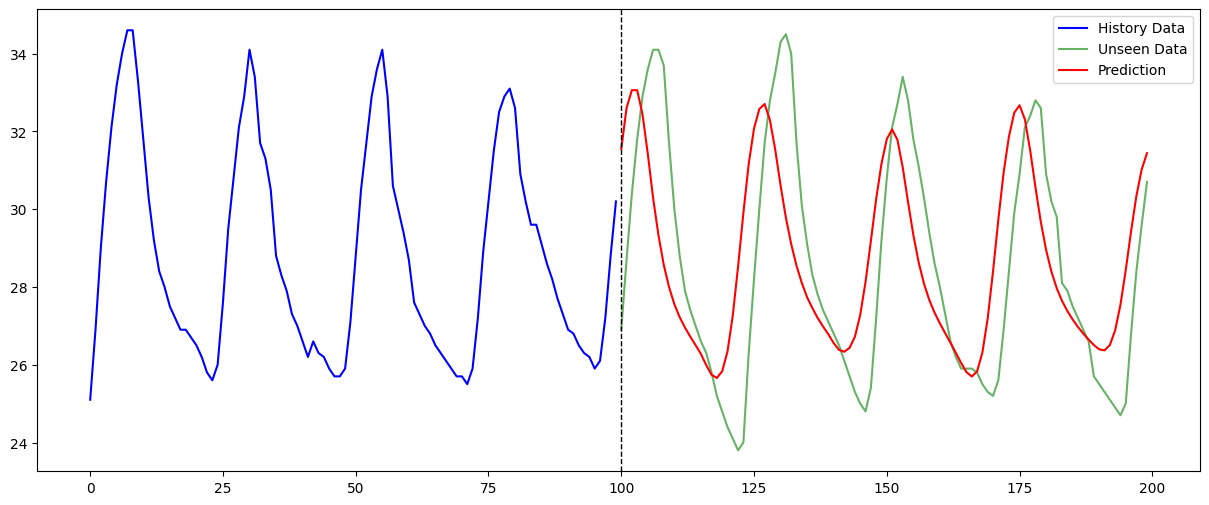

In [136]:
n_prior = 100
n_forecast = 100

history = datas[:n_prior].tolist()
preds = []

input_seq = history[-n_steps:]

for i in range(n_forecast):
    x_input = np.array(input_seq).reshape(1, n_steps, 1)
    pred = model.predict(x_input, verbose=0)[0,0]
    preds.append(pred)

    input_seq = input_seq[1:] + [pred]

plt.figure(figsize=(15,6))
plt.plot(range(n_prior), history, 'b-', label="History Data")
plt.plot(range(n_prior, n_prior+n_forecast), y[n_prior:n_prior+n_forecast], 'g-', alpha=0.6, label="Unseen Data")
plt.plot(range(n_prior, n_prior+n_forecast), preds, 'r-', label="Prediction")
plt.axvline(n_prior, color='k', linestyle="--", linewidth=1)
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(506, 1)


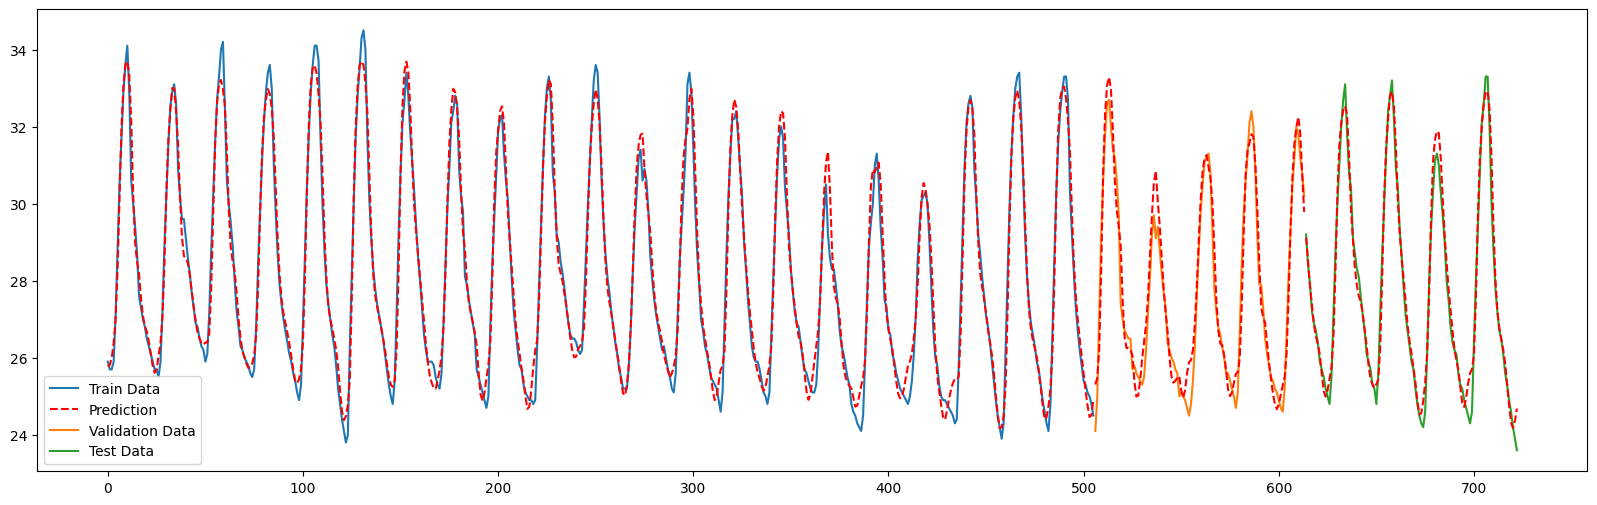

range(506, 614)
range(0, 506)


In [135]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

print(y_pred_train.shape)
plt.figure(figsize=(20, 6))
range_val = train_size+val_size
range_test = range_val+test_size
#plt.subplot(3, 1, 1)
plt.plot(range(train_size),y[:train_size], label='Train Data')
plt.plot(range(train_size), y_pred_train, label='Prediction', color='red', linestyle='--')
plt.plot(range(train_size, range_val),y[train_size:val_size+train_size], label='Validation Data')
plt.plot(range(train_size, range_val), y_pred_val,  color='red', linestyle='--')
plt.plot(range(range_val, range_test), y[-test_size:], label="Test Data")
plt.plot(range(range_val, range_test), y_pred_test, color='red', linestyle='--')
plt.legend()
plt.show()
print(range(train_size, train_size+val_size))
print(range(train_size))